<a href="https://colab.research.google.com/github/emadaghajanzadeh/Clustring_with_Neural_Networks/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [2]:
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,max_iter=30).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))

In [ ]:
y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))

In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
print(purity_score(np.argmax(y_test, axis = -1 ), y_pred))

0.8801961796179618
0.5944


In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

max_iteration = [10,30,50,70,90,110]
num_clusters = [2,5,8,10,15,20]
result1 = []
result2 = []
# for iter in max_iteration:
#   print(iter)
#   kmeans = KMeans(n_clusters=10,max_iter=iter).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))
#   y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))
#   result1.append(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
#   result2.append(purity_score(np.argmax(y_test, axis = -1 ), y_pred))
for cluster in num_clusters:
  print(cluster)
  kmeans = KMeans(n_clusters=cluster,max_iter=30).fit(x_train.reshape(x_train.shape[0], input_shape[0]*input_shape[1]))
  y_pred = kmeans.predict(x_test.reshape(x_test.shape[0], input_shape[0]*input_shape[1]))
  result1.append(rand_score(np.argmax(y_test, axis = -1 ), y_pred))
  result2.append(purity_score(np.argmax(y_test, axis = -1 ), y_pred))


2
5
8
10
15
20


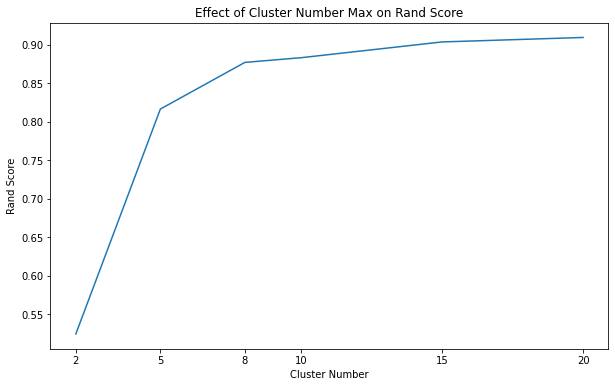

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_clusters, result1)
plt.xlabel("Cluster Number")
plt.ylabel("Rand Score")
plt.xticks(num_clusters)
plt.title("Effect of Cluster Number Max on Rand Score")
plt.savefig("./rand_score", dpi = 300)

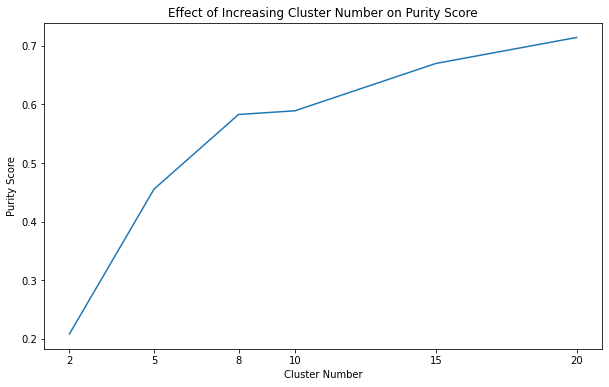

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_clusters, result2)
plt.xlabel("Cluster Number")
plt.ylabel("Purity Score")
plt.xticks(num_clusters)
plt.title("Effect of Increasing Cluster Number on Purity Score")
plt.savefig("./purity_score", dpi = 300)

##MLP

###Data Loading

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist
import keras
import numpy as np
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
# !pip install --upgrade scikit-learn
# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [33]:
#Generating 10 random numbers
random_indexes = np.ceil(X_train.shape[0]*np.random.random(10)).astype(int)
#Choosing 10 samples according to these 10 indexes
centersX = X_train[random_indexes]
#Assigning each of these 10 samples to a distinct cluster
centersY = np.arange(0,10)
print(centersX.shape)
print(centersY)

(10, 784)
[0 1 2 3 4 5 6 7 8 9]


In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

Epoch Number: 0
3.3191502


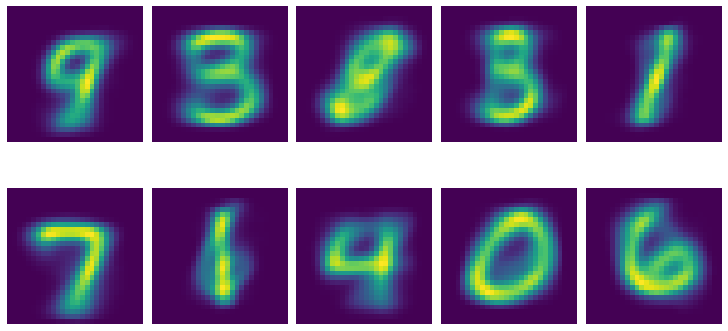

Epoch Number: 1
2.7137454


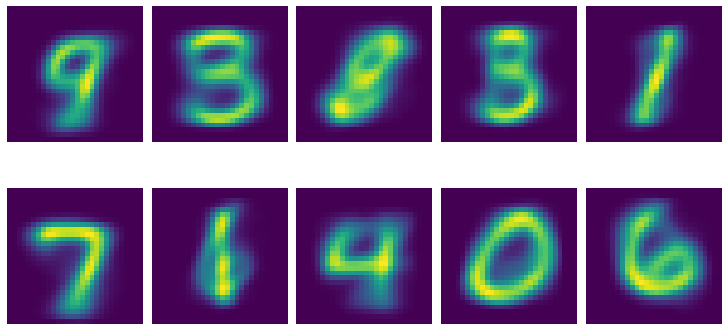

Epoch Number: 2
2.1757092


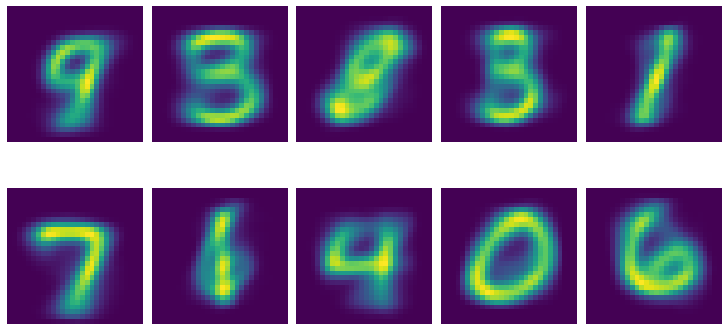

Epoch Number: 3
1.7253093


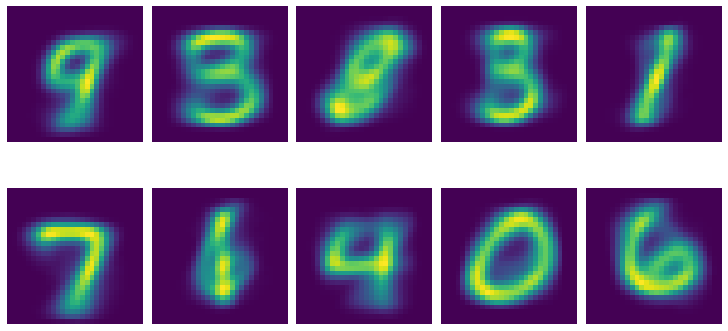

Epoch Number: 4
1.3606834


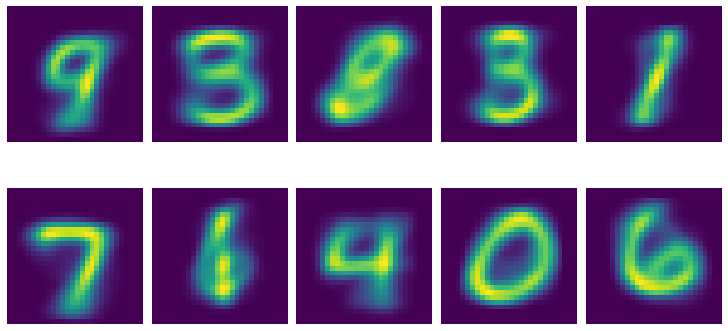

Epoch Number: 5
1.0657421


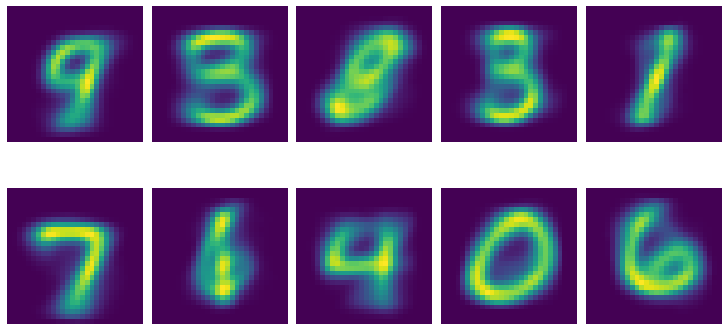

Epoch Number: 6
0.8284799


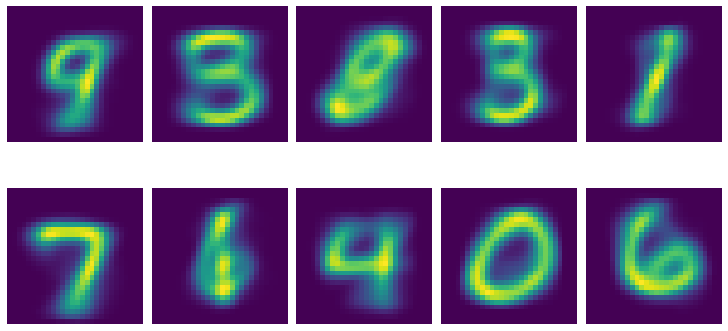

Epoch Number: 7
0.641584


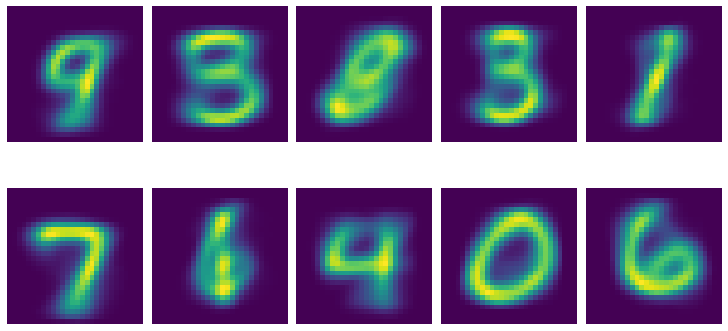

Epoch Number: 8
0.494085


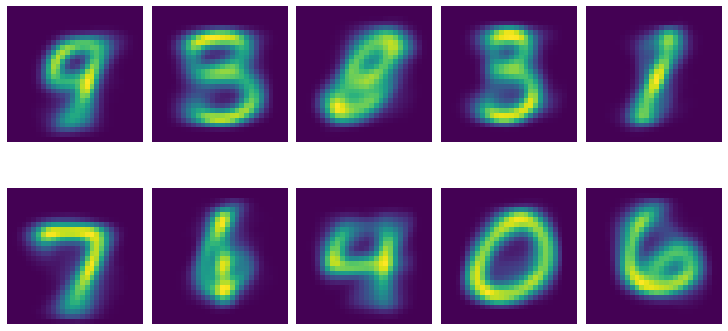

Epoch Number: 9
0.3794293


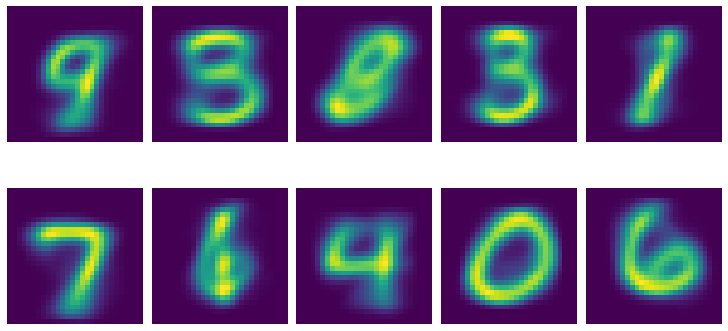

Epoch Number: 10
0.29280964


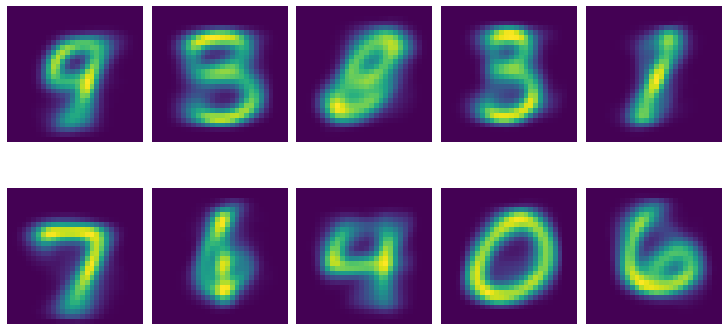

Epoch Number: 11
0.2262469


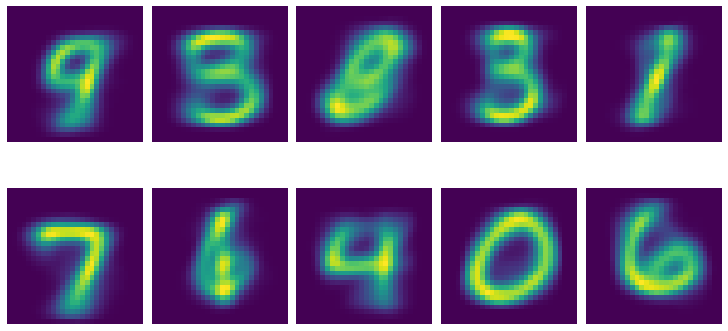

Epoch Number: 12
0.17545137


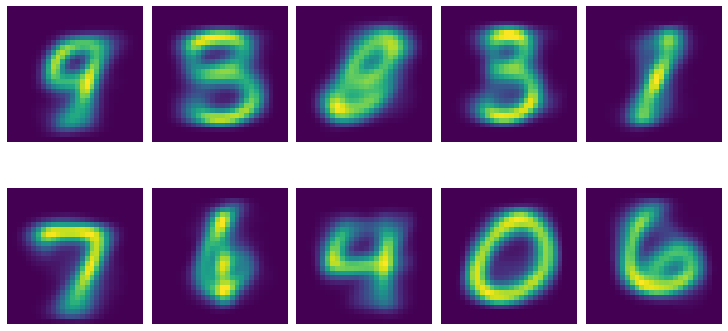

Epoch Number: 13
0.13661268


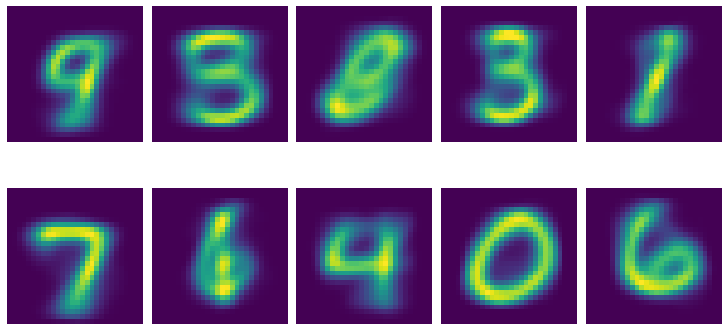

Epoch Number: 14
0.10747899


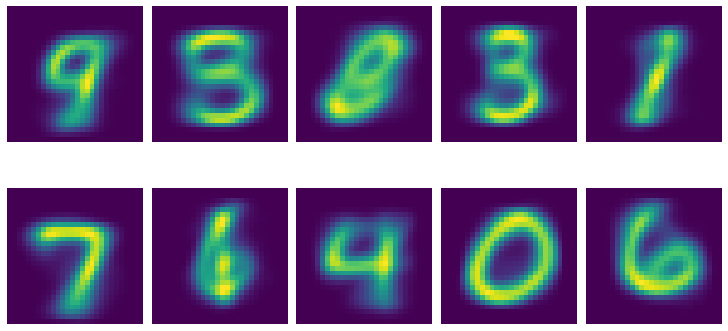

Epoch Number: 15
0.0851618


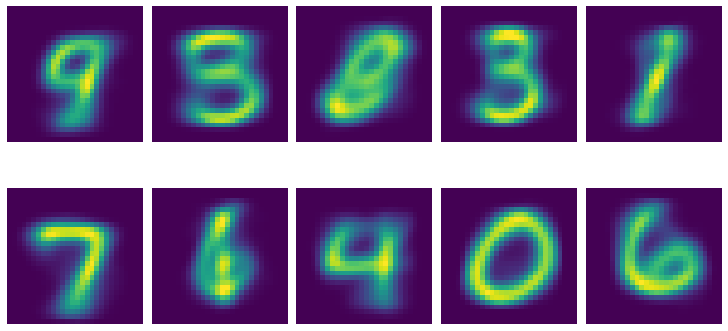

Epoch Number: 16
0.06809486


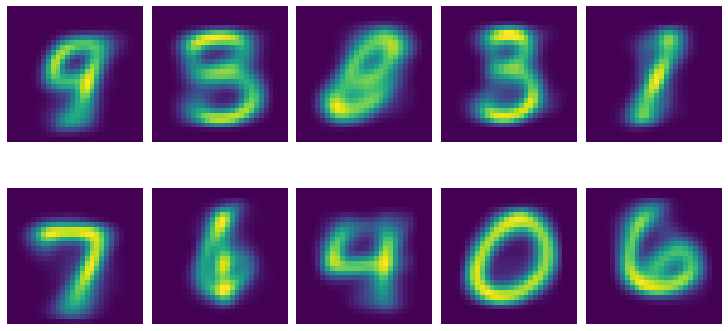

Epoch Number: 17
0.054821815


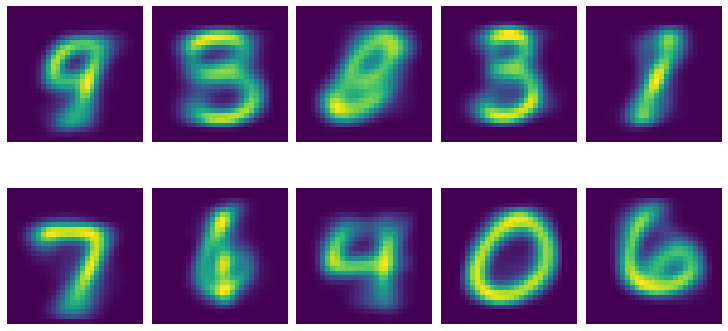

Epoch Number: 18
0.044540334


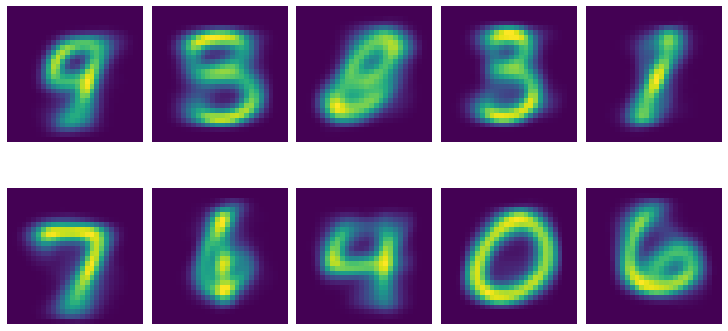

Epoch Number: 19
0.036628462


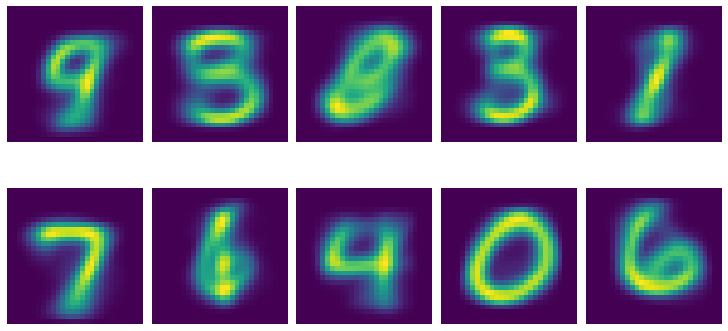

In [38]:
from tensorflow.keras.utils import to_categorical
def loss_fn(yPred, yTrue):
      return keras.losses.categorical_crossentropy(to_categorical(yTrue), yPred)

optimizer = keras.optimizers.Adam()
epochs = 20

for epoch in range(epochs):
        print(f'Epoch Number: {epoch}')
        x_batch_train = centersX

        with tf.GradientTape() as tape:
            # Cluster centers are fed to the model.
            logits = model(x_batch_train.reshape(-1,28,28,1))
            # Compute the loss value for cluster centers
            loss_value = loss_fn(logits, centersY)
            # Print the sum of errors for all cluster
            print(np.sum(loss_value))
            
        # Optimize the model given loss value
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Assigning all data to clusters
        prediction = np.argmax(model(X_train.reshape(-1,28,28,1)), axis=-1)
        
        indexes = {}
        # Updating the cluster centers for all clusters
        for i in range(10):
          # Getting indexes of all samples belonging to a cluster
          indexes[i] = np.where(prediction == i)[0]
          # Here "samples" contains all samples belong to a specific cluster.
          samples = X_train[indexes[i]]
          centersX[i] = np.mean(samples, axis=0)
          centersY[i] = i
        
        # plt.rcParams["figure.figsize"] = (20,10)
        plt.rcParams['figure.facecolor'] = 'white'
        plt.figure(figsize=(10, 5), constrained_layout=True )
        clusters = np.arange(10)
        for key , task in enumerate(clusters):
          plt.subplot(2, 5, key+1)
          plt.axis("off")
          plt.imshow(centersX[key].reshape(28,28))
        # plt.save
        plt.show()
        





Model Evaluation

In [37]:
y_pred = model.predict(X_test.reshape(-1,28,28,1))
# print(y_pred[0])
# print(y_pred[1])
from sklearn.metrics.cluster import rand_score
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print(rand_score(np.argmax(Y_test, axis = -1 ), np.argmax((y_pred), axis = -1)))
print(purity_score(np.argmax(Y_test, axis = -1 ), np.argmax((y_pred), axis = -1)))

0.8506335233523352
0.4923
